In [1]:
import pandas as pd

In [62]:
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Visualizing data using seaborn

In [7]:
import seaborn as sns
%matplotlib inline

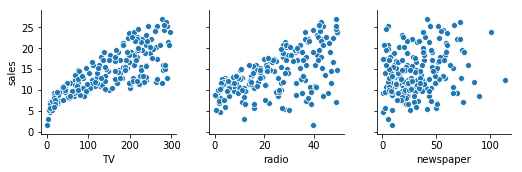

In [16]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales')

/home/ayush/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


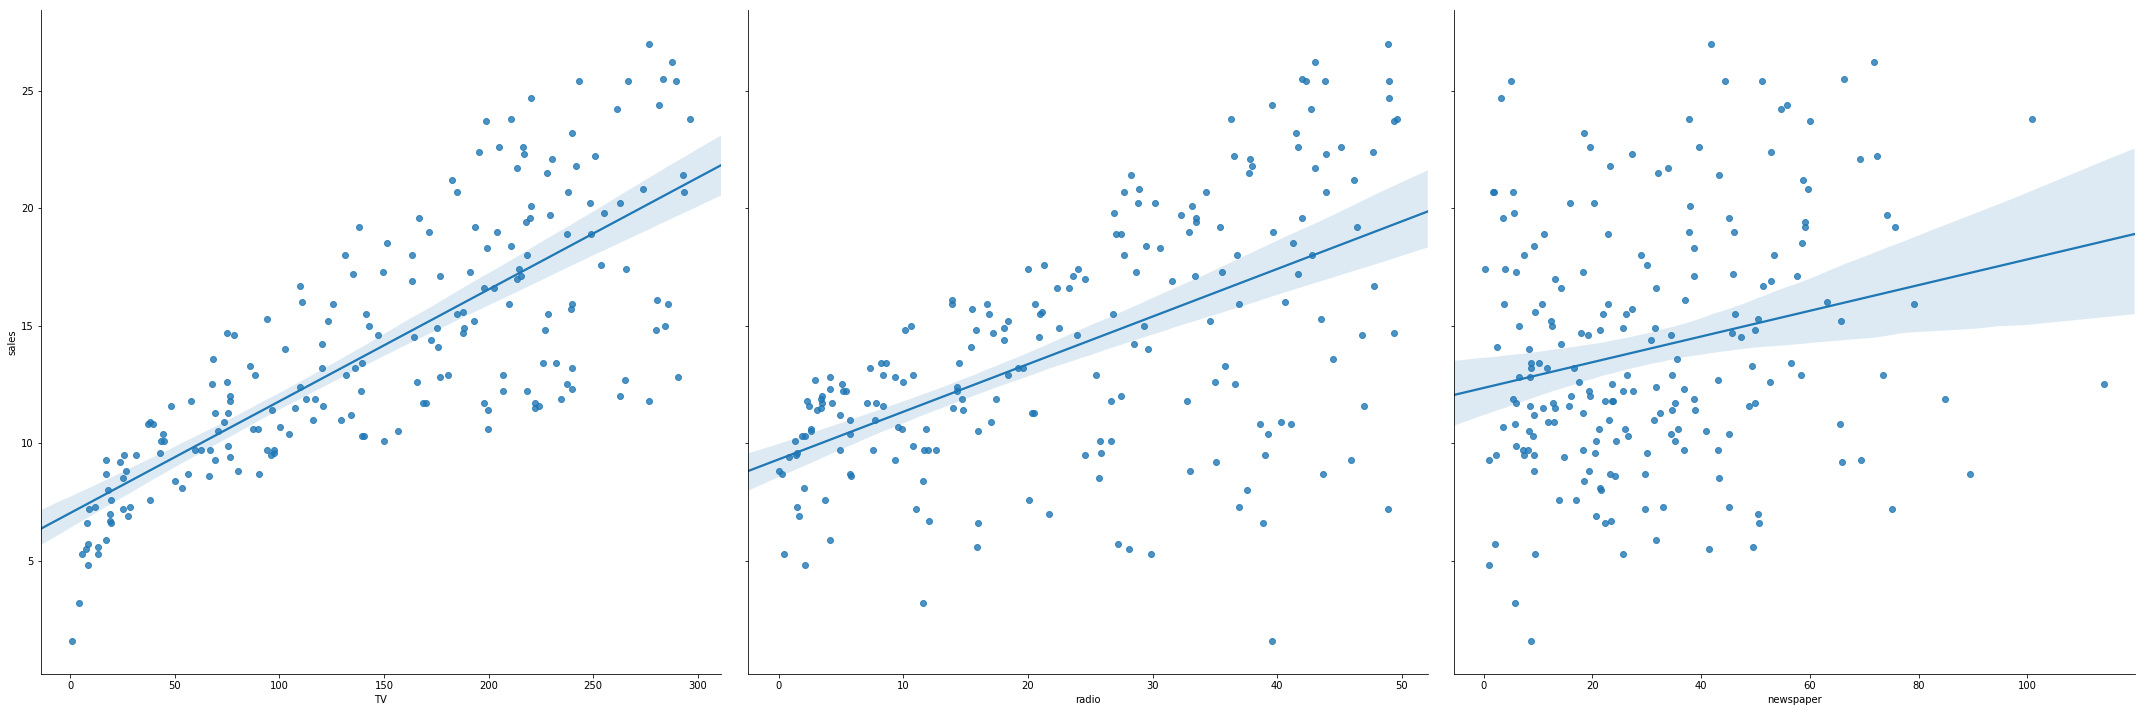

In [32]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',kind='reg',height=10)

In [43]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [36]:
y=data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Preparing X and y using pandas

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [41]:
X_train.shape

(150, 3)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# $$y=\beta1(TV)+\beta2(radio)+\beta3(newspaper)+c$$

In [64]:
print(linreg.intercept_) #shows value of c
print(linreg.coef_) #shows beta1, beta2, beta3

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [50]:
list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

In [51]:
y_pred=linreg.predict(X_test)

## Model Evaluation Metrics

In [59]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred)) #Calculate mean absolute error

1.0668917082595213


In [60]:
print(metrics.mean_squared_error(y_test,y_pred)) #Calculate mean squared error

1.9730456202283384


In [61]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #Calculate root mean squard error

1.4046514230328955
